# Part 4

## 1.Data Preparation

### a. Load the dataset and preprocess

In [59]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


data = pd.read_csv('/content/drive/My Drive/winequality-red.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [61]:
data = data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

In [62]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [63]:
data.columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

In [64]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [65]:
data.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [66]:
data = data.apply(pd.to_numeric, errors='coerce')

In [67]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Standardize the data

In [69]:
from sklearn.preprocessing import StandardScaler
X = data.drop('quality',axis = 1)
y = data['quality']

In [70]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [71]:
y.head(1)

0    5
Name: quality, dtype: int64

In [72]:
scaler = StandardScaler()

In [73]:
X = scaler.fit_transform(X)

In [74]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 9)

## 2. Model design

### d.Design two artificial neural networks

### 1. Neural Network 2 hidden layers

In [75]:
# NetworkTwoHidden
model_two_hidden = keras.models.Sequential([
    keras.layers.Dense(11, activation='relu', input_shape=(input_dimension,)),#first hidden layer
    keras.layers.Dense(8, activation='relu'),# second hidden layer
    keras.layers.Dense(1, activation=None)
])

In [81]:

# NetworkOneHidden
model_one_hidden = keras.models.Sequential([
    keras.layers.Dense(11, activation='relu', input_shape=(input_dimension,)),#first hidden layer
    keras.layers.Dense(1, activation=None)#second hidden layer
])


In [82]:
# Compile both models
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_two_hidden.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
model_one_hidden.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

### 3. Model Training

### (e) Configure both networks for training using the same specification described in Part III, 3. Model Training, (e)

In [79]:
# Model Training
history_two_hidden = model_two_hidden.fit(
    Xtrain, ytrain,
    batch_size=10,
    epochs=25,
    validation_split=0.1,
    verbose=0
)




In [83]:
history_one_hidden = model_one_hidden.fit(
    Xtrain, ytrain,
    batch_size=10,
    epochs=25,
    validation_split=0.1,
    verbose=0
)


## 4. Model Comparison
### (f) Create a plot to illustrate the loss curves for both neural network models, enabling visualization of the change in training loss values over epochs.

Text(0.5, 1.0, 'Loss Curves')

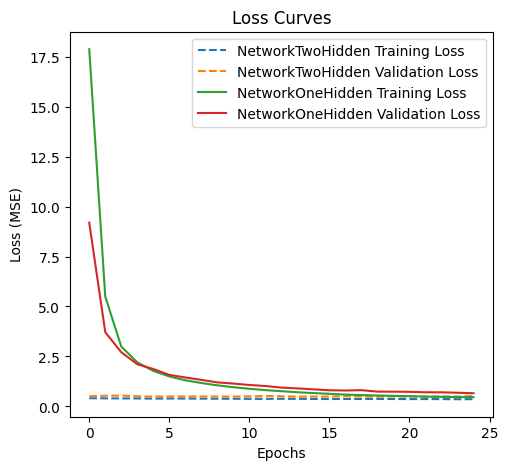

In [84]:
plt.figure(figsize=(12, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history_two_hidden.history['loss'], label='NetworkTwoHidden Training Loss', linestyle='--')
plt.plot(history_two_hidden.history['val_loss'], label='NetworkTwoHidden Validation Loss', linestyle='--')
plt.plot(history_one_hidden.history['loss'], label='NetworkOneHidden Training Loss')
plt.plot(history_one_hidden.history['val_loss'], label='NetworkOneHidden Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Loss Curves')

### g. Create a plot to display the Mean Squared Error (MSE) curves for both neural network models, facilitating comparison of the change in MSE values over the epochs.

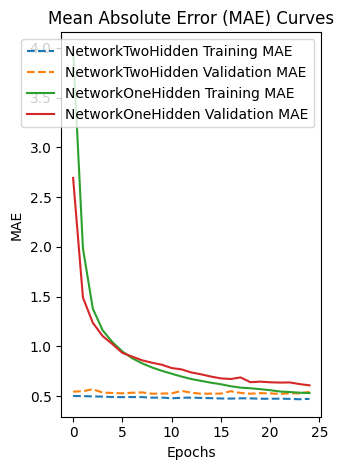

In [85]:
plt.subplot(1, 2, 2)
plt.plot(history_two_hidden.history['mean_absolute_error'], label='NetworkTwoHidden Training MAE', linestyle='--')
plt.plot(history_two_hidden.history['val_mean_absolute_error'], label='NetworkTwoHidden Validation MAE', linestyle='--')
plt.plot(history_one_hidden.history['mean_absolute_error'], label='NetworkOneHidden Training MAE')
plt.plot(history_one_hidden.history['val_mean_absolute_error'], label='NetworkOneHidden Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error (MAE) Curves')

plt.tight_layout()
plt.show()

## 5. Analysis

1. **Loss Curve Analysis**
   - *Trainig Loss* - In both curves, the training loss decreases and then levels off, which indicates that both models are learning from the training data.
   - *Validation Loss* - Again, even for both networks, the validation loss flattens out because both models perform well on unseen data.
   - *Comparison* - Both models have similar performance with respect to loss. There is no significant divergence between the training and validation loss, so both models are not overfitting.

2. **MAE Analysis**
   - *Training MAE* - This is the average magnitude of errors during the training. The training MAE for both networks decreases and then plateaus, which shows learning and convergence.
   - *Validation MAE* - This is similar to the training MAE, which indicates good generalization.
   - *Comparison* - Both networks show similar MAE trends and no overfitting. Both models' MAE curves converge closely, showing that increasing the network depth does not affect the average error magnitude.

3. **Network Depth**
   - From the plots, it does not indicate that network depth has a significant impact on the performance as measured by loss and MAE. The two networks perform almost the same.

4. **Validation Loss vs Training Loss**
   - Validation loss and training loss remain close to each other during the training process. This indicates that the model is generalizing well to unseen data.

5. **Learning Trends**
   - Both networks show large improvement in the initial epochs. As the epochs increase, the rate of improvement in both loss and MAE decreases.
   
In conclusion, we can conclude that increasing the network depth does not significantly improve the model's performance.

